In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('bot_detection_data.csv')

In [2]:
# Data Cleaning

import string
import nltk
# nltk.download() # to download any missing nltk packages
from nltk.corpus import stopwords
from nltk import word_tokenize

df.columns = df.columns.str.lower().str.replace(' ','_')

In [3]:

def text_cleaning(a):
    remove_punctuation = [char for char in a if char not in string.punctuation]
    remove_punctuation = ''.join(remove_punctuation)
    return [word for word in remove_punctuation.split() if word.lower() not in stopwords.words('english')]

In [4]:
print(df.tweet.apply(text_cleaning))

0        [Station, activity, person, natural, majority,...
1        [Authority, research, natural, life, material,...
2        [Manage, whose, quickly, especially, foot, non...
3              [cover, eight, opportunity, strong, policy]
4                          [Animal, sign, six, data, good]
                               ...                        
49995    [Want, put, card, direction, know, miss, forme...
49996    [Provide, whole, maybe, agree, church, respond...
49997    [Bring, different, everyone, international, ca...
49998        [single, generation, seek, sell, still, hour]
49999    [morning, class, various, room, human, true, l...
Name: tweet, Length: 50000, dtype: object


In [5]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer=text_cleaning).fit(df['tweet'])

bow_transformer.vocabulary_

{'Station': 733,
 'activity': 879,
 'person': 1409,
 'natural': 1349,
 'majority': 1300,
 'none': 1363,
 'size': 1560,
 'expect': 1121,
 'six': 1559,
 'marriage': 1308,
 'Authority': 59,
 'research': 1494,
 'life': 1279,
 'material': 1309,
 'staff': 1588,
 'rate': 1467,
 'common': 1018,
 'protect': 1451,
 'attention': 925,
 'Manage': 435,
 'whose': 1706,
 'quickly': 1461,
 'especially': 1106,
 'foot': 1159,
 'goal': 1183,
 'range': 1466,
 'case': 984,
 'cover': 1037,
 'eight': 1093,
 'opportunity': 1382,
 'strong': 1606,
 'policy': 1423,
 'Animal': 36,
 'sign': 1547,
 'data': 1047,
 'good': 1184,
 'See': 664,
 'wonder': 1716,
 'travel': 1663,
 'suffer': 1616,
 'less': 1275,
 'yard': 1726,
 'office': 1371,
 'man': 1302,
 'certainly': 992,
 'Door': 209,
 'final': 1143,
 'sound': 1576,
 'guess': 1192,
 'building': 971,
 'rich': 1503,
 'Job': 381,
 'phone': 1411,
 'price': 1440,
 'magazine': 1296,
 'worry': 1721,
 'stage': 1589,
 'check': 999,
 'view': 1684,
 'Eye': 257,
 'rest': 1499,
 'p

In [6]:
tweet_bow = bow_transformer.transform(df['tweet'])

print(tweet_bow)

  (0, 733)	1
  (0, 879)	1
  (0, 1121)	1
  (0, 1300)	1
  (0, 1308)	1
  (0, 1349)	1
  (0, 1363)	1
  (0, 1409)	1
  (0, 1559)	1
  (0, 1560)	1
  (1, 59)	1
  (1, 925)	1
  (1, 1018)	1
  (1, 1279)	1
  (1, 1309)	1
  (1, 1349)	1
  (1, 1451)	1
  (1, 1467)	1
  (1, 1494)	1
  (1, 1588)	1
  (2, 435)	1
  (2, 984)	1
  (2, 1106)	1
  (2, 1159)	1
  (2, 1183)	1
  :	:
  (49996, 1312)	1
  (49996, 1496)	1
  (49996, 1705)	1
  (49997, 97)	1
  (49997, 978)	1
  (49997, 1067)	1
  (49997, 1114)	1
  (49997, 1185)	1
  (49997, 1243)	1
  (49997, 1727)	1
  (49998, 1177)	1
  (49998, 1216)	1
  (49998, 1528)	1
  (49998, 1530)	1
  (49998, 1554)	1
  (49998, 1599)	1
  (49999, 925)	1
  (49999, 1008)	1
  (49999, 1220)	1
  (49999, 1293)	1
  (49999, 1337)	1
  (49999, 1510)	1
  (49999, 1531)	1
  (49999, 1670)	1
  (49999, 1683)	1


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(tweet_bow)
print(tfidf_transformer)

tweet_tfidf = tfidf_transformer.transform(tweet_bow)
print(tweet_tfidf)
print(tweet_tfidf.shape)

In [8]:
X = tweet_tfidf
Y = df['bot_label']
from sklearn.naive_bayes import MultinomialNB

# Model training
model = MultinomialNB().fit(X,Y)

In [34]:
# Predict Output
predicted = model.predict(X)

print("All Predictions:")
print(predicted)

All Predictions:
50000


In [10]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score
)

y_pred = model.predict(X)
accuracy = accuracy_score(y_pred, Y)
f1 = f1_score(y_pred, Y, average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.57384
F1 Score: 0.5738483461097345


Confusion matrix, without normalization
[[14226 10756]
 [10552 14466]]
Normalized confusion matrix
[[0.56945    0.43055   ]
 [0.42177632 0.57822368]]


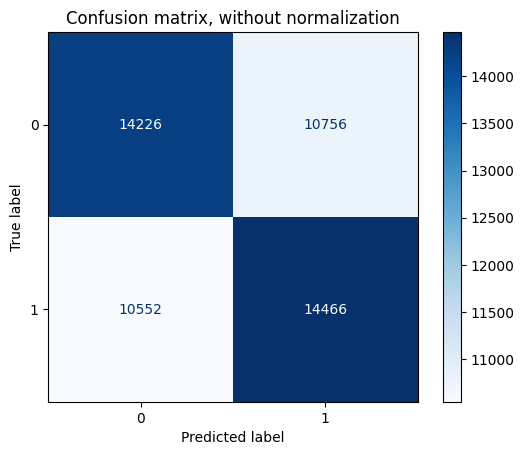

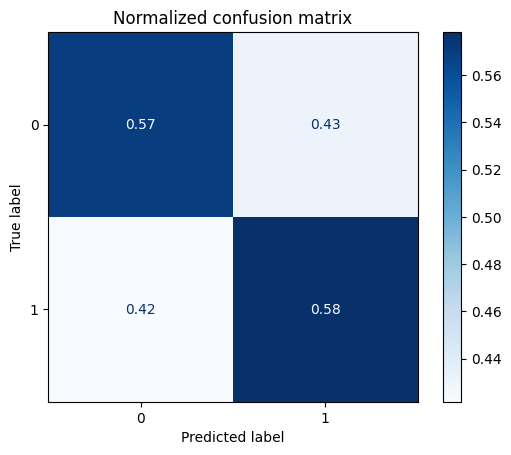

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X,
        Y,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [41]:
# sampleTweet = "Get prizes in my profile"
sampleTweet = "Introducing Seekers of the Storm, the second expansion for Risk of Rain 2! It expands the game's story while adding new Survivors, items, enemies, stages, & more. Seekers of the Storm will be available on Xbox One, PS4, Nintendo Switch, & PC!"
sampleTweet = list(sampleTweet)
sampleTweetDF = pd.DataFrame(sampleTweet)
print(sampleTweetDF.apply(text_cleaning))
print(sampleTweetDF.)
sample_tweet_bow = bow_transformer.transform(sampleTweetDF[1])

# print(sample_tweet_bow)

sample_tfidf_transformer = TfidfTransformer().fit(sample_tweet_bow)
# print(sample_tfidf_transformer)

sample_tweet_tfidf = sample_tfidf_transformer.transform(sample_tweet_bow)
# print(sample_tweet_tfidf)
# print(sample_tweet_tfidf.shape)

predicted = model.predict(sample_tweet_tfidf)
print(predicted)


ones = 0 
zeroes = 0
for i in predicted:
    if i == 1:
        ones += 1
    else:
        zeroes += 1

print("Ones: ", ones)
print("Zeroes: ", zeroes)

     0
0    I
1    n
2    t
3    r
4    o
..  ..
237  &
238   
239  P
240  C
241  !

[242 rows x 1 columns]
              0
0   Introducing
1       Seekers
2         Storm
3        second
4     expansion
5          Risk
6          Rain
7             2
8       expands
9         games
10        story
11       adding
12          new
13    Survivors
14        items
15      enemies
16       stages
17      Seekers
18        Storm
19    available
20         Xbox
21          One
22          PS4
23     Nintendo
24       Switch
25           PC


TypeError: 'int' object is not iterable